# DS4DS Homework Exercise Sheet 01

We have the two matrices $A$, $B$:

$
A = \begin{bmatrix} 0 & 0 \\ 2 & 0 \end{bmatrix}, \\
B = \begin{bmatrix} 0 & -1 \\ 4 & 0 \end{bmatrix}
$

In [1]:
A = [0 0; 2 0]

B = [0 -1; 4 0]

2×2 Matrix{Int64}:
 0  -1
 4   0

### Task 1: Calculate the eigenvalues of the matrices $A$,$B$ and assign them to *eig_A* and *eig_B* - (1 point)
**Hint:** You should calculate them by hand and insert them here. Alternatively, you may solve this in Julia, but without the use of any extra packages.

In [29]:
eig_A = 0
eig_B = 0

#--- YOUR CODE STARTS HERE ---#
# calculation
# det_A_λ = -λ * -λ - 2 * 0 = λ²
# => λ² = 0 == λ = ±0
eig_A = [0, 0]

# calculation
# det_B_λ = -λ * -λ - 4 * (-1) => λ² + 4 
# => λ² + 4 = 0 
# <=> λ² = -4
# <=> λ = ± sqrt(-4)
# <=> λ = ± sqrt(4) * sqrt(-1)
# <=> λ = ± 2i
eig_B = [2im, -2im]

#--- YOUR CODE ENDS HERE ---#

2-element Vector{Complex{Int64}}:
 0 + 2im
 0 - 2im

In [30]:
@assert isa(eig_A,Array)
@assert isa(eig_A,Vector)
@assert !isa(eig_A,Matrix)
@assert length(eig_A) == 2


In [19]:
@assert isa(eig_B,Array)
@assert isa(eig_B,Vector)
@assert !isa(eig_B,Matrix)
@assert length(eig_B) == 2


### Task 2: Calculate the matrix exponential function of matrix A and B (by hand) [ exp(A\*t) and exp(B\*t) ] - (3 points)

**Hint 1:** You should calculate them by hand and insert them here. Alternatively, you may solve this in Julia, but without the use of any extra packages.

**Hint 2:** The function should at the end return a 2x2 matrix 

**Important: The use of exp() function will result in 0 points**

In [20]:
#Here is an example how the functions should look like
function example(t)
    return [1*t 2; 3 4*t]
end

example (generic function with 1 method)

In [62]:
function matrixExponentA(t)
    sum_curr = sum_old = [0 0; 0 0]
    converged = false
    k = 0
    while !converged
        sum_curr = sum_curr + A^k * t^k / factorial(k)
        k = k + 1
        if sum_curr == sum_old
            converged = true
        end
        sum_old = sum_curr
    end
    return sum_curr
end

function matrixExponentB(t)
    sum_curr = sum_old = [0 0; 0 0]
    converged = false
    k = 0
    while !converged
        sum_curr = sum_curr + B^k * t^k / factorial(big(k))
        k = k + 1
        if sum_curr == sum_old
            converged = true
        end
        sum_old = sum_curr
    end
    return sum_curr
end


matrixExponentB (generic function with 1 method)

In [57]:
@assert isa(matrixExponentA,Function)
@assert size(matrixExponentA(0)) == (2,2)


In [58]:
@assert isa(matrixExponentB,Function)
@assert size(matrixExponentB(0)) == (2,2)


In [59]:
# please leave this cell as it is


### Task 3: Calculate the system reactions $x(t)$ for a general $t$ and $x_0$ - (2 points)

In [ ]:
x0 = [1; 1]

#Here is an example how the functions should look like. The function should at the end return a 2x1 vector
function example(t, x0)
    return [1 ; 2]
end

In [65]:
function state_response_A(t, x0)
    return matrixExponentA(t) * x0
end

function state_response_B(t, x0)
    return matrixExponentB(t) * x0
end

state_response_B (generic function with 1 method)

In [66]:
@assert isa(state_response_A,Function)
@assert size(state_response_A(0, [0; 0])) == (2,)


In [67]:
@assert isa(state_response_B,Function)
@assert size(state_response_B(0, [0; 0])) == (2,)


### Task 4: Plot the resulting time series with plots.jl for a given time interval into a common plot - (3 points)

Note: Take care of proper formatting of the plot. In particular, add correct axis labeling and a legend to be able to differentiate the time series.

In [68]:
using Plots

In [69]:
# time points
t_values = 0:0.01:5
N = size(t_values)[1]

x0 = [1; 1]

# fill with time series for matrix A and B respectively
xt_A = zeros((N, 2));
xt_B = zeros((N, 2));

In [77]:
i = 1
for val in t_values
    xt_A[i,:] = state_response_A(val, x0)
    xt_B[i,:] = state_response_B(val, x0) 
    i += 1
end

In [ ]:
@assert size(xt_A) == (501, 2)
@assert size(xt_B) == (501, 2)

@assert any(xt_A .!= 0)
@assert any(xt_B .!= 0)

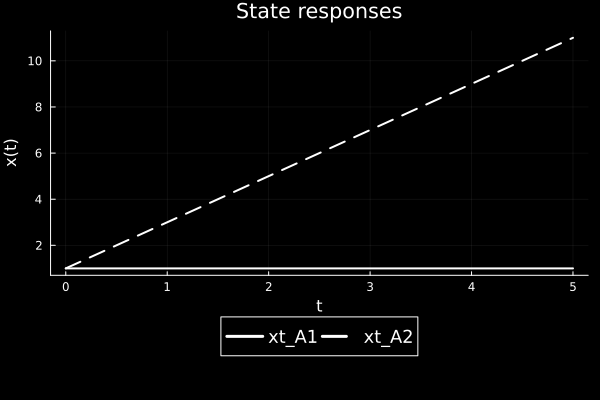

In [117]:
p1 = plot(xlabel="t", ylabel="x(t)",
     title="State responses",grid=true,
     background_color="#000000")
plot!(p1, t_values, xt_A[:, 1], linecolor=:white, linestyle=:solid,
     linewidth=2, label="xt_A1")
plot!(p1, t_values, xt_A[:, 2], linecolor=:white, linestyle=:dash,
     linewidth=2, label="xt_A2")
plot!(p1, legend=:outerbottom, legendcolumns=2, legendfontcolor=:white,
     legendfontsize=12)

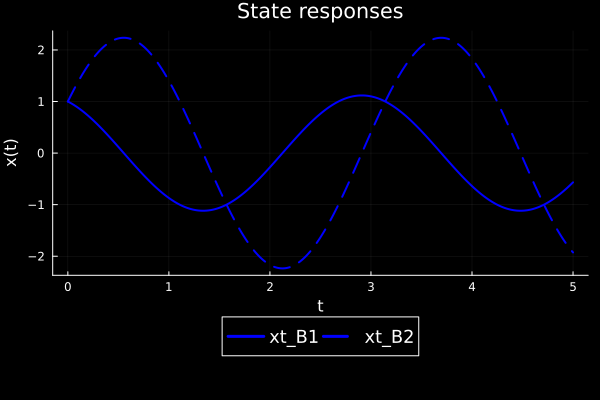

In [118]:
p2 = plot(xlabel="t", ylabel="x(t)",
     title="State responses",grid=true,
     background_color="#000000")
plot!(p2, t_values, xt_B[:, 1], linecolor=:blue, linestyle=:solid,
     linewidth=2, label="xt_B1")
plot!(p2, t_values, xt_B[:, 2], linecolor=:blue, linestyle=:dash,
     linewidth=2, label="xt_B2")
plot!(p2, legend=:outerbottom, legendcolumns=2, legendfontcolor=:white,
     legendfontsize=12)

### Task 5: In each case, make a statement whether the autonomous system described by the matrices is state-stable - (1 point)
Therefore assign the corresponding value to the given variables.

The system is:\
1: Stable\
2: asymptotically stable\
3: Unstable

In [119]:
stability_of_A = 1
stability_of_B = 1

1

In [120]:
@assert isa(stability_of_A, Number)


In [121]:
@assert isa(stability_of_B, Number)
